In [2]:
import pyodbc as py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab
get_ipython().magic('matplotlib inline')
import os,time,datetime
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [3]:
# Importing the dataset
telco = pd.read_csv('Telco_Customer_Churn.csv')
#Churn_data.head()
telco.shape

(7043, 21)

In [4]:
telco.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
telco[ "Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
telco["gender"]=np.where(telco.gender == "Female",1,0)
telco["gender"]=np.where(telco.gender == "Male",1,0)
telco["Partner"]=np.where(telco.Partner == "Yes",1,0)
telco["Partner"]=np.where(telco.Partner == "No",1,0)
telco["Dependents"]=np.where(telco.Dependents == "Yes",1,0)
telco["Dependents"]=np.where(telco.Dependents == "No",1,0)
telco["PhoneService"]=np.where(telco.PhoneService == "Yes",1,0)
telco["PhoneService"]=np.where(telco.PhoneService == "No",1,0)
telco["MultipleLines"]=np.where(telco.MultipleLines == "Yes",1,0)
telco["MultipleLines"]=np.where(telco.MultipleLines == "No",1,0)
telco["MultipleLines"]=np.where(telco.MultipleLines == "No phone service",1,0)
telco["InternetService"]=np.where(telco.InternetService == "No",1,0)
telco["InternetService"]=np.where(telco.InternetService == "Fiber optic",1,0)
telco["InternetService"]=np.where(telco.InternetService == "DSL",1,0)
telco["OnlineSecurity"]=np.where(telco.OnlineSecurity == "Yes",1,0)
telco["OnlineSecurity"]=np.where(telco.OnlineSecurity == "No",1,0)
telco["OnlineSecurity"]=np.where(telco.OnlineSecurity == "No internet service",1,0)
telco["OnlineBackup"]=np.where(telco.OnlineBackup == "Yes",1,0)
telco["OnlineBackup"]=np.where(telco.OnlineBackup == "No",1,0)
telco["OnlineBackup"]=np.where(telco.OnlineBackup == "No internet service",1,0)
telco["DeviceProtection"]=np.where(telco.DeviceProtection == "Yes",1,0)
telco["DeviceProtection"]=np.where(telco.DeviceProtection == "No",1,0)
telco["DeviceProtection"]=np.where(telco.DeviceProtection == "No internet service",1,0)
telco["TechSupport"]=np.where(telco.TechSupport == "Yes",1,0)
telco["TechSupport"]=np.where(telco.TechSupport == "No",1,0)
telco["TechSupport"]=np.where(telco.TechSupport == "No internet service",1,0)
telco["StreamingTV"]=np.where(telco.StreamingTV == "Yes",1,0)
telco["StreamingTV"]=np.where(telco.StreamingTV == "No",1,0)
telco["StreamingTV"]=np.where(telco.StreamingTV == "No internet service",1,0)
telco["StreamingMovies"]=np.where(telco.StreamingMovies == "Yes",1,0)
telco["StreamingMovies"]=np.where(telco.StreamingMovies == "No",1,0)
telco["StreamingMovies"]=np.where(telco.StreamingMovies == "No internet service",1,0)
telco["Contract"]=np.where(telco.Contract == "Two year",1,0)
telco["Contract"]=np.where(telco.Contract == "One year",1,0)
telco["Contract"]=np.where(telco.Contract == "Month-to-month",1,0)
telco["PaperlessBilling"]=np.where(telco.PaperlessBilling == "Yes",1,0)
telco["PaperlessBilling"]=np.where(telco.PaperlessBilling == "No",1,0)
telco["PaymentMethod"]=np.where(telco.PaymentMethod == "Electronic check",1,0)
telco["PaymentMethod"]=np.where(telco.PaymentMethod == "Mailed check",1,0)
telco["PaymentMethod"]=np.where(telco.PaymentMethod == "Bank transfer (automatic)",1,0)
telco["PaymentMethod"]=np.where(telco.PaymentMethod == "Credit card (automatic)",1,0)
telco["Churn"]=np.where(telco.Churn == "No",1,0)
telco["Churn"]=np.where(telco.Churn == "Yes",1,0)

In [28]:
def returnFeatureImportance(est, col):
    feature_importance = est.feature_importances_
    feature_importance_rel = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance_rel)
    featuresNames = []
    featureImps =[]
    featureImps_Rel = []
    for item in sorted_idx[::-1][:]:
        featuresNames.append(np.asarray(col)[item])
        featureImps.append(feature_importance[item])
        featureImps_Rel.append(feature_importance_rel[item])
    featureImportance = pd.DataFrame([featuresNames, featureImps, featureImps_Rel]).transpose()
    featureImportance.columns = ['FeatureName', 'Importance', 'Relative Importance']
    return featureImportance

In [29]:
#from sklearn.tree import DecisionTreeClassifier
# Get the Classification Report, Confusion Matrix, ROC Plots and Feature Importance for the model


def roc_plot(fpr, tpr, fpr_tst, tpr_tst, var):
    fig=plt.plot(fpr, tpr, label='Train')
    fig=plt.plot(fpr_tst, tpr_tst, label='Test')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title("ROC curve using " + var + " data")
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc='lower right')
    plt.grid(True)
    #save(output+'roc_'+var, ext="png", close=False, verbose=True)  
    plt.show()

      
    
def get_confmatrix_roc_featimp(est, prefix, X_train1, X_test1, Y_train, Y_test):
    # Predicting target variable for training and 2015&2016 testing dataset
    train_pred = est.predict(X_train1)
    test_pred = est.predict(X_test1)
    train_pred_prob = est.predict_proba(X_train1)[:,1]
    test_pred_prob = est.predict_proba(X_test1)[:,1]
    
    # Confusion Matrix for Train dataset 
    print ("\nTrain Data for - " + prefix )
    expected = Y_train
    predicted = est.predict(X_train1)
    class_rep_tr = metrics.classification_report(expected, predicted)
    print ("Classification report of the model " + prefix + " is:\n ", class_rep_tr)
    conf_mat_tr = metrics.confusion_matrix(expected, predicted)
    print ("Confusion matrix of the model " + prefix + " is:\n ", conf_mat_tr)
    acc_tr=metrics.accuracy_score(expected, predicted)
    print ("Accuracy of the model " + prefix + " is: ", acc_tr)
    sensitivity_tr=metrics.recall_score(expected, predicted)
    print ("Recall/Sensitivity of the model " + prefix + " is: ", sensitivity_tr)
    
    # Confusion Matrix for Test dataset
    print ("\n\nTest Data for - " + prefix)
    expected = Y_test 
    predicted = est.predict(X_test1)
    class_rep_tst = metrics.classification_report(expected, predicted)
    print ("Classification report of the model " + prefix + " is:\n ", class_rep_tst)
    conf_mat_tst = metrics.confusion_matrix(expected, predicted)
    print ("Confusion matrix of the model " + prefix + " is:\n ", conf_mat_tst)
    acc_tst=metrics.accuracy_score(expected, predicted)
    print ("Accuracy of the model " + prefix + " is: ", acc_tst)
    sensitivity_tst=metrics.recall_score(expected, predicted)
    print ("Recall/Sensitivity of the model " + prefix + " is: ", sensitivity_tst)
    
    # ROC Curve for Train data
    fpr, tpr, thresholds = metrics.roc_curve(Y_train, train_pred_prob)
    AUC_Train = metrics.roc_auc_score(Y_train, train_pred_prob)
    print ("train_" + prefix + "_AUC = " , AUC_Train)
    # ROC Curve for Test data
    fpr_tst, tpr_tst, thresholds = metrics.roc_curve(Y_test, test_pred_prob)
    tr_tst_prefix = "train_test_" + prefix
    roc_plot(fpr, tpr, fpr_tst, tpr_tst, prefix)
    AUC_Test = metrics.roc_auc_score(Y_test, test_pred_prob)
    print ("test_" + prefix + "_auc = " , AUC_Test)
    
    # Feature Importances
    #featureImp = returnFeatureImportance(est, X_train1.columns)
    #featureImp.to_csv(output+"FeatureImp_" + prefix + ".csv")
    
    return test_pred_prob, train_pred_prob, class_rep_tr, conf_mat_tr, class_rep_tst, conf_mat_tst , acc_tr, acc_tst,sensitivity_tr, sensitivity_tst,AUC_Train, AUC_Test


In [22]:
Y = telco['Churn']
X = telco.drop(['Churn'], axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=25)

In [24]:
X_train.shape, X_test.shape

((4930, 20), (2113, 20))

In [26]:
X_train1 = X_train.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], axis=1)
X_test1 = X_test.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
           'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'], axis=1)

#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html    -  Refer for Hyper Parameter explaination

In [27]:
est = RandomForestClassifier(n_estimators=275, criterion='gini', max_depth=6, min_samples_split=6, min_samples_leaf=2,
                             min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, 
                             random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, 
                             max_samples=None, class_weight='balanced')

#class_weight={0: 0.5, 1: 5}


 RF Approach Results:


Train Data for - RF
Classification report of the model RF is:
                precision    recall  f1-score   support

           0       0.93      0.83      0.88      5544
           1       0.54      0.77      0.63      1456

    accuracy                           0.81      7000
   macro avg       0.73      0.80      0.75      7000
weighted avg       0.85      0.81      0.83      7000

Confusion matrix of the model RF is:
  [[4574  970]
 [ 332 1124]]
Accuracy of the model RF is:  0.814
Recall/Sensitivity of the model RF is:  0.771978021978022


Test Data for - RF
Classification report of the model RF is:
                precision    recall  f1-score   support

           0       0.92      0.82      0.87      2419
           1       0.49      0.71      0.58       581

    accuracy                           0.80      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.80      0.81      3000

Confusion matrix of the model RF

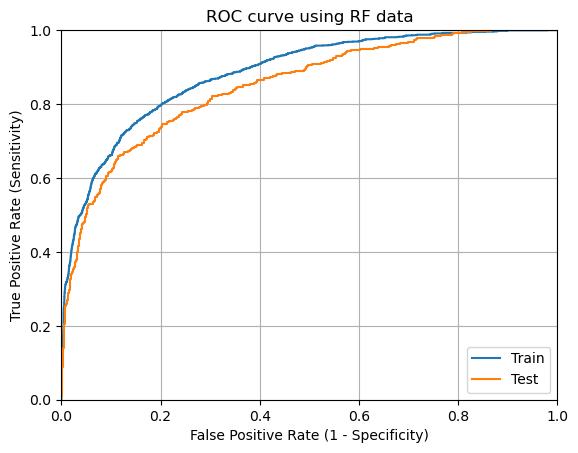

test_RF_auc =  0.8492535072671243


In [79]:
RF_Model = est.fit(X_train1, y_train)
print ("\n RF Approach Results:\n")
RF_Prob_Test, RF_Prob_Train, class_rep_tr, conf_mat_tr, class_rep_tst, conf_mat_tst , acc_tr, acc_tst,sensitivity_tr,sensitivity_tst, AUC_Train, AUC_Test= get_confmatrix_roc_featimp(RF_Model,'RF', X_train1, X_test1, y_train, y_test)